# Quiz: Autocorrelation, stationarity, time series forecasting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Даны данные по ежемесячному уровню производства молока в фунтах на одну корову. Загрузите ряд и постройте график

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='month'>

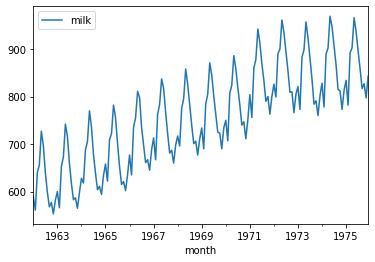

In [4]:
milk.plot()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Чему равен полученный достигаемый уровень значимости? 

In [5]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221219,
 0.6274267086030352,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.  
В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [6]:
milk['days'] = [pd.Period(str(day)[:10]).days_in_month for day in milk.index]#pd.Period(milk['milk']).days_in_month

In [8]:
milk['daily'] = milk['milk']/milk['days']
milk.head()

,milk,days,daily
month,,,
1962-01-01,589,31,19.000000
1962-02-01,561,28,20.035714
1962-03-01,640,31,20.645161
1962-04-01,656,30,21.866667
1962-05-01,727,31,23.451613


In [9]:
milk['daily'].sum()

4166.326661899466

<AxesSubplot:xlabel='month'>

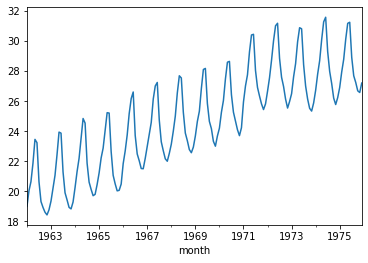

In [10]:
milk['daily'].plot()

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. 

In [11]:
milk['daily_diff1'] = milk['daily'] - milk['daily'].shift(1)

<AxesSubplot:xlabel='month'>

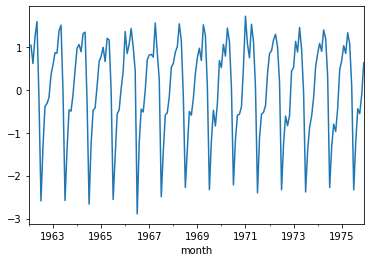

In [12]:
milk['daily_diff1'].plot()


iter no 2 
Fuller (-2.7594694762289262, 0.0643005465417445, 11, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, -1.1539973381055688)

iter no 4 
Fuller (-2.7937982963242978, 0.05916511252379179, 9, 154, {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}, -0.7967393228710193)

iter no 6 
Fuller (-3.666770636411523, 0.0046055892687224265, 12, 146, {'1%': -3.4759527332353084, '5%': -2.881548071241103, '10%': -2.577438765246763}, 80.12169731805625)

iter no 8 
Fuller (-3.3893348113259982, 0.011327864936595235, 14, 137, {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603}, 56.38632164384987)

iter no 10 
Fuller (-4.108678623334504, 0.0009370231442405691, 13, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 74.20891976175994)


<ipython-input-13-b28c5c111112>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk[column_name] = milk['daily'] - milk['daily'].shift(i)



iter no 12 
Fuller (-3.6426133475973685, 0.0049967073981015105, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 86.67725360956547)

iter no 14 
Fuller (-2.971936939454172, 0.03759955189177335, 13, 105, {'1%': -3.4942202045135513, '5%': -2.889485291005291, '10%': -2.5816762131519275}, 65.32223425312537)


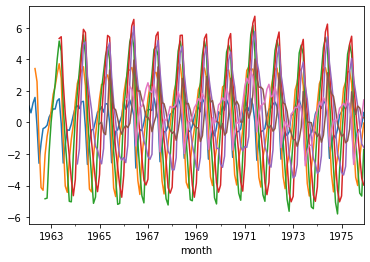

In [13]:
for i in range(1,15,2):
    column_name = 'daily_diff' + str(i)
    milk[column_name] = milk['daily'] - milk['daily'].shift(i)
    milk = milk.dropna()#(inplace=True)
    #sm.tsa.stattools.adfuller(milk[column_name])
    print("\niter no", i+1, "\nFuller",sm.tsa.stattools.adfuller(milk[column_name]))
    milk[column_name].plot()
    #plt.show()

In [14]:
milk.head()

,milk,days,daily,daily_diff1,daily_diff3,daily_diff5,daily_diff7,daily_diff9,daily_diff11,daily_diff13
month,,,,,,,,,,
1966-02-01,635,28,22.678571,0.839862,2.611905,2.178571,0.033410,-2.547235,-0.192396,1.452765
1966-03-01,736,31,23.741935,1.063364,3.258065,3.709677,2.677419,-1.458065,-0.324731,1.527650
1966-04-01,755,30,25.166667,1.424731,3.327957,5.100000,4.666667,2.521505,-0.059140,2.295699
1966-05-01,811,31,26.161290,0.994624,3.482719,5.677419,6.129032,5.096774,0.961290,2.094624
1966-06-01,798,30,26.600000,0.438710,2.858065,4.761290,6.533333,6.100000,3.954839,1.374194


<AxesSubplot:xlabel='month'>

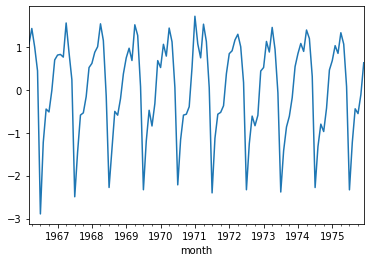

In [15]:
milk['task'] = milk['daily'] - milk['daily'].shift(1)
milk = milk.dropna()
sm.tsa.stattools.adfuller(milk['task'])
milk['task'].plot()

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.  
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

<AxesSubplot:xlabel='month'>

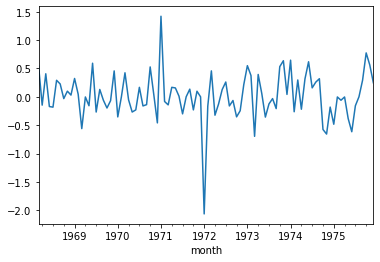

In [17]:
milk['task'] = milk['task'] - milk['task'].shift(12)
milk = milk.dropna()
sm.tsa.stattools.adfuller(milk['task'])
milk['task'].plot()

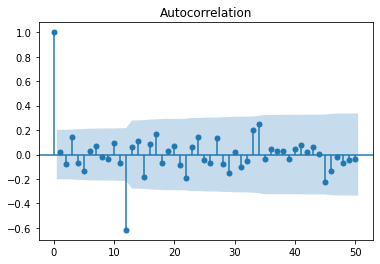

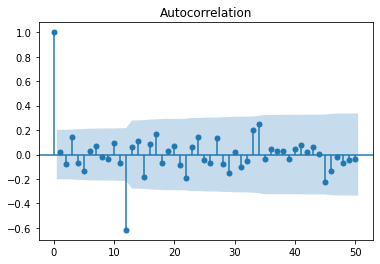

In [18]:
sm.graphics.tsa.plot_acf(milk['task'].values.squeeze(), lags=50)

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.  
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра ppp в модели SARIMA?

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 50 must be < 47.

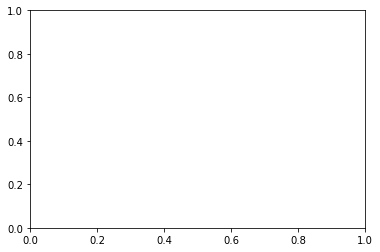

In [21]:
sm.graphics.tsa.plot_pacf(milk['milk'].values.squeeze(), lags=50)